<a href="https://colab.research.google.com/github/Ruslan26reg/NGDM-Nesterov-with-Dirichlet-Distribution/blob/main/1%20task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Kerakli kutubxonalarni Import qilishimport cv2
import numpy as np
import matplotlib.pyplot as plt

# Google Colab uchun - rasm yuklang
from google.colab import files
from google.colab.patches import cv2_imshow

In [23]:
# Tasviringizni yuklang (Colab uchun)
uploaded = files.upload()

Saving image-109.png to image-109 (1).png


Image loaded successfully!
Image dimensions: (403, 623, 3)


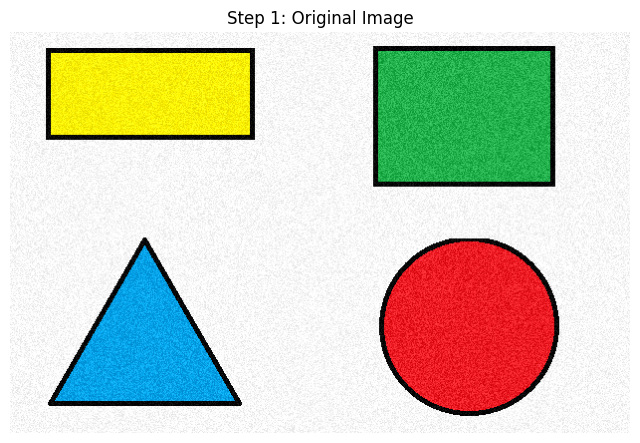

In [24]:
# Yuklangan rasmning fayl nomini oling
filename = list(uploaded.keys())[0]

# Asl rasmni yuklang
original_image = cv2.imread(filename)

# Rasm muvaffaqiyatli yuklanganligini tekshiring
if original_image is None:
    print("Error: Could not load image!")
else:
    print(f"Image loaded successfully!")
    print(f"Image dimensions: {original_image.shape}")

# Asl rasmni ko'rsatish
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()

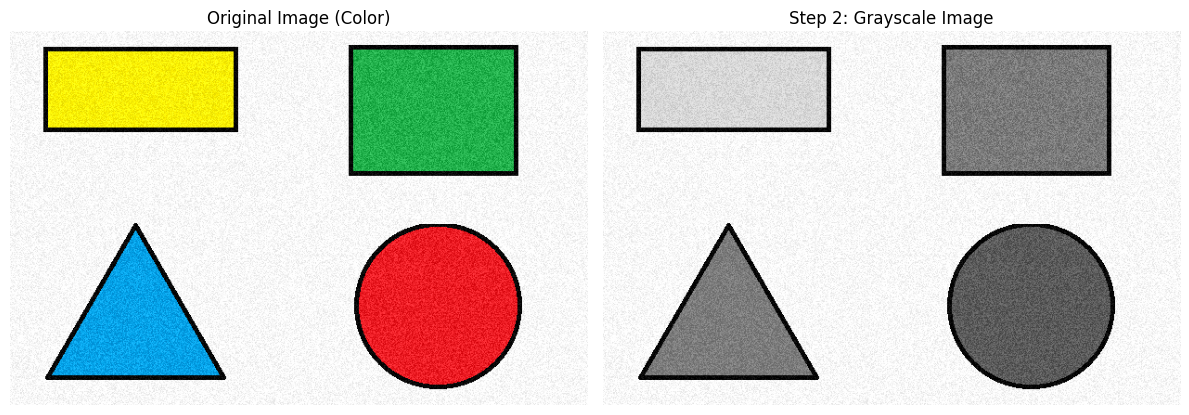

Original image shape: (403, 623, 3)
Grayscale image shape: (403, 623)


In [25]:
# BGR tasvirini kulrang rangga aylantiring
# Grayscale 3 ta rang kanalini 1 ga kamaytiradi, ishlov berishni soddalashtiradi
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Displeyni taqqoslash
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Asl rasm
axes[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image (Color)')
axes[0].axis('off')

# Kulrang rangdagi rasm
axes[1].imshow(gray_image, cmap='gray')
axes[1].set_title('Step 2: Grayscale Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print(f"Original image shape: {original_image.shape}")
print(f"Grayscale image shape: {gray_image.shape}")

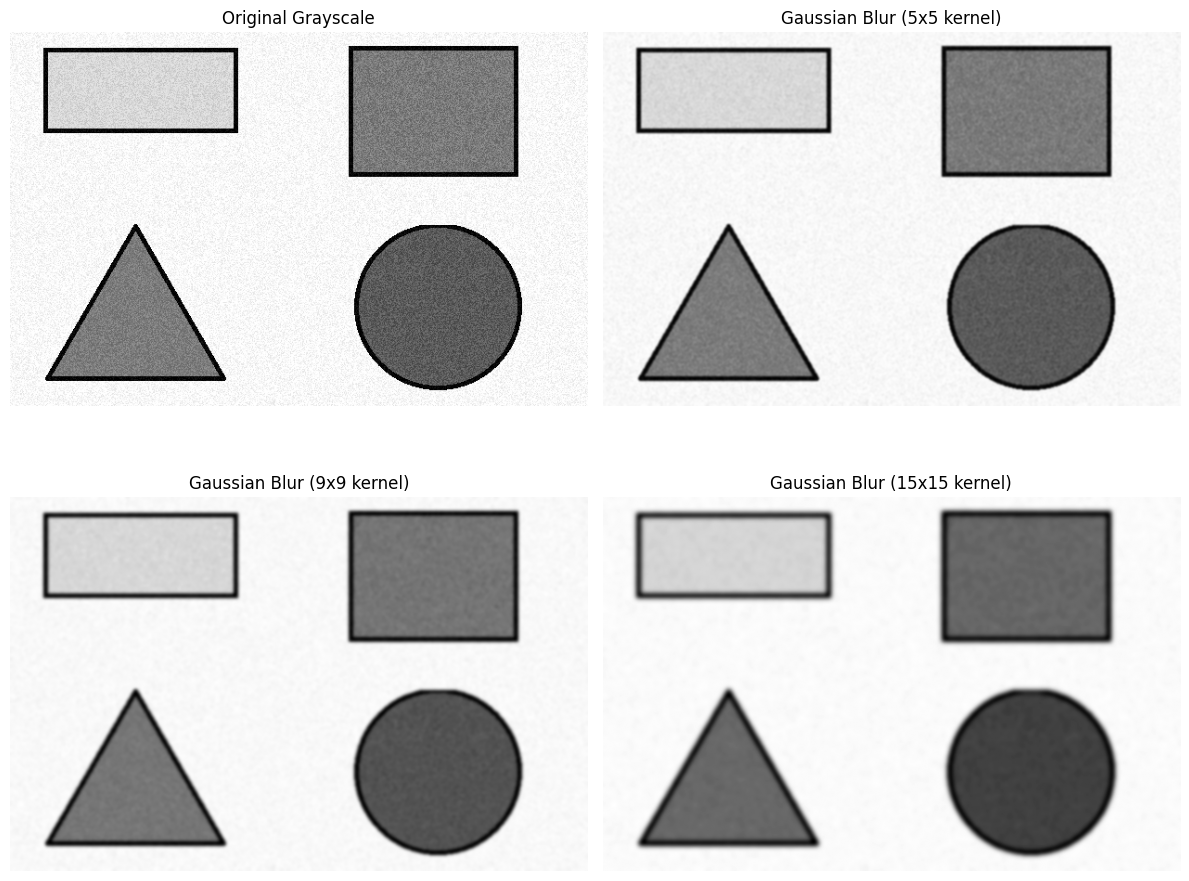

Selected 5x5 Gaussian Blur for further processing


In [26]:
# Gauss loyqaligini turli xil yadro o'lchamlari bilan qo'llang
# Kattaroq yadro = ko'proq loyqalik = ko'proq shovqinni kamaytirish

# Yadro o'lchami (5,5) - o'rtacha loyqalik
blurred_5x5 = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Yadro o'lchami (9,9) - kuchli loyqalik
blurred_9x9 = cv2.GaussianBlur(gray_image, (9, 9), 0)

# Yadro o'lchami (15,15) - juda kuchli xiralik
blurred_15x15 = cv2.GaussianBlur(gray_image, (15, 15), 0)

# Displeyni taqqoslash
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].imshow(gray_image, cmap='gray')
axes[0, 0].set_title('Original Grayscale')
axes[0, 0].axis('off')

axes[0, 1].imshow(blurred_5x5, cmap='gray')
axes[0, 1].set_title('Gaussian Blur (5x5 kernel)')
axes[0, 1].axis('off')

axes[1, 0].imshow(blurred_9x9, cmap='gray')
axes[1, 0].set_title('Gaussian Blur (9x9 kernel)')
axes[1, 0].axis('off')

axes[1, 1].imshow(blurred_15x15, cmap='gray')
axes[1, 1].set_title('Gaussian Blur (15x15 kernel)')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

# Keyingi ishlov berish uchun optimal xiralashishni tanlang
blurred_image = blurred_5x5
print("Selected 5x5 Gaussian Blur for further processing")

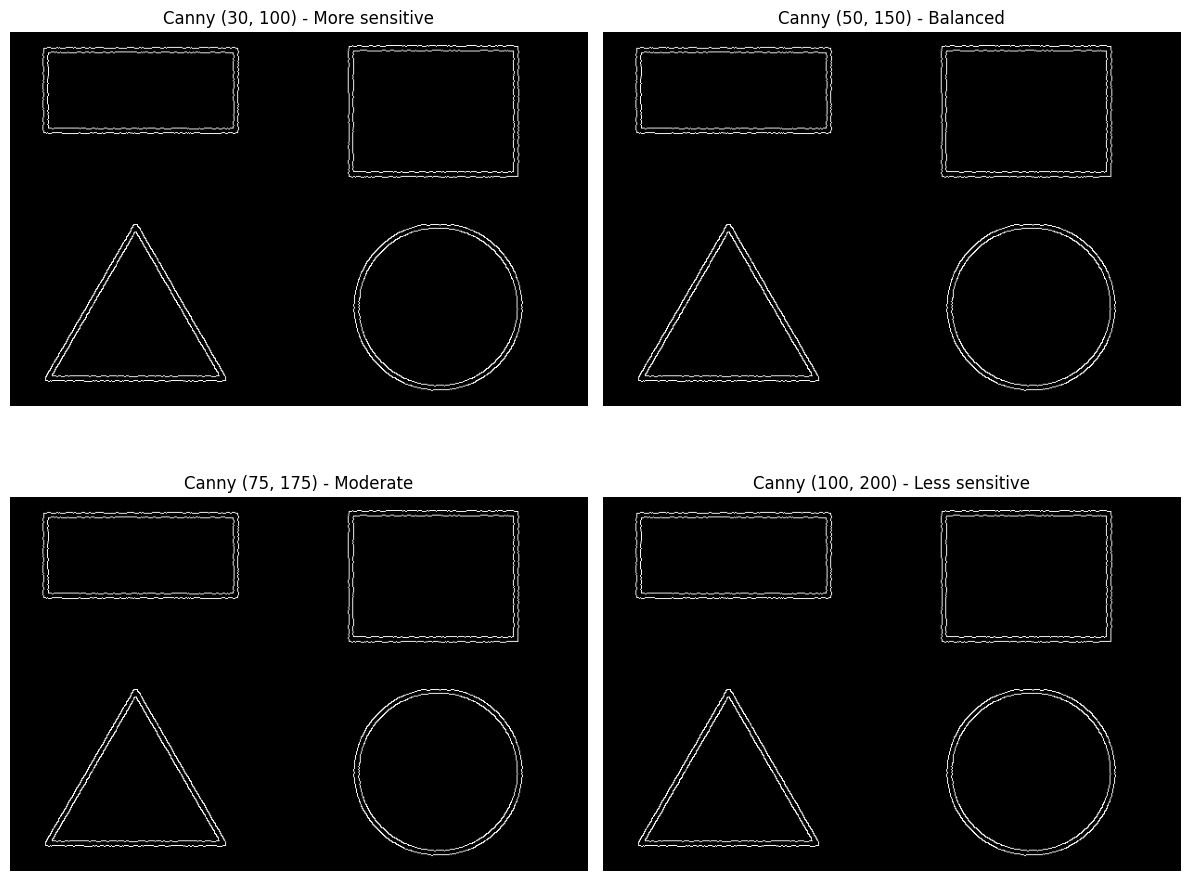

Selected Canny(50, 150) for clear contours with minimal noise


In [27]:
# Canny algoritmi ikkita chegaradan foydalanadi: past va baland
# Intensivlik gradyanli qirralar > yuqori chegara kuchli qirralardir
# Chegaralar orasidagi qirralar zaif qirralardir (kuchli ulangan bo'lsa saqlanadi)

# Turli chegara kombinatsiyalarini sinab ko'ring
canny_50_150 = cv2.Canny(blurred_image, 50, 150)
canny_30_100 = cv2.Canny(blurred_image, 30, 100)
canny_100_200 = cv2.Canny(blurred_image, 100, 200)
canny_75_175 = cv2.Canny(blurred_image, 75, 175)

# Displeyni taqqoslash
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].imshow(canny_30_100, cmap='gray')
axes[0, 0].set_title('Canny (30, 100) - More sensitive')
axes[0, 0].axis('off')

axes[0, 1].imshow(canny_50_150, cmap='gray')
axes[0, 1].set_title('Canny (50, 150) - Balanced')
axes[0, 1].axis('off')

axes[1, 0].imshow(canny_75_175, cmap='gray')
axes[1, 0].set_title('Canny (75, 175) - Moderate')
axes[1, 0].axis('off')

axes[1, 1].imshow(canny_100_200, cmap='gray')
axes[1, 1].set_title('Canny (100, 200) - Less sensitive')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

# Optimal Canny natijasini tanlang
canny_edges = canny_50_150
print("Selected Canny(50, 150) for clear contours with minimal noise")

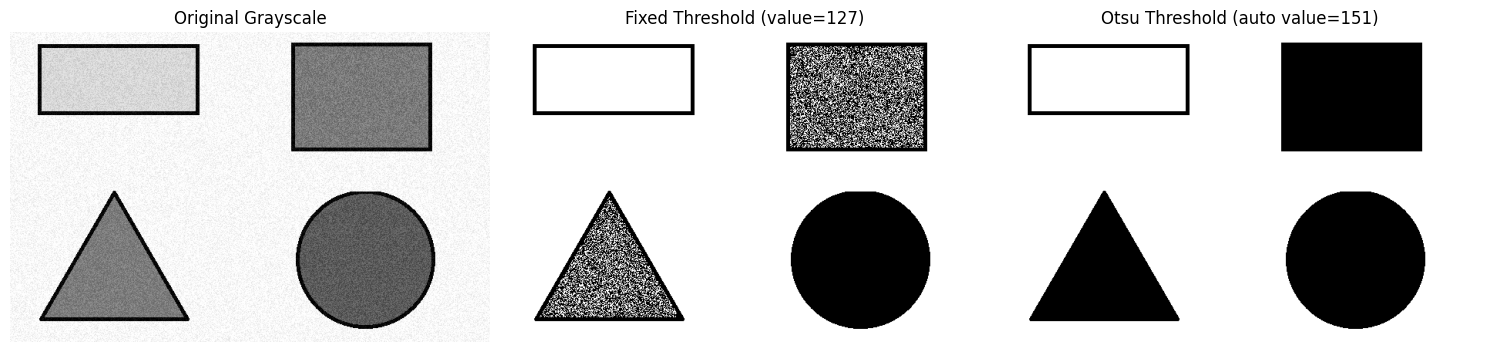

Fixed threshold value: 127
Otsu automatically calculated threshold: 151


In [28]:
# 127 (0-255 oralig'ining o'rtasi)
threshold_value = 127
ret_fixed, binary_fixed = cv2.threshold(gray_image, threshold_value, 255,
                                         cv2.THRESH_BINARY)

# Otsu usuli optimal chegarani avtomatik ravishda hisoblab chiqadi
ret_otsu, binary_otsu = cv2.threshold(gray_image, 0, 255,
                                       cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Displeyni taqqoslash
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(gray_image, cmap='gray')
axes[0].set_title('Original Grayscale')
axes[0].axis('off')

axes[1].imshow(binary_fixed, cmap='gray')
axes[1].set_title(f'Fixed Threshold (value={threshold_value})')
axes[1].axis('off')

axes[2].imshow(binary_otsu, cmap='gray')
axes[2].set_title(f'Otsu Threshold (auto value={ret_otsu:.0f})')
axes[2].axis('off')

plt.tight_layout()
plt.show()

print(f"Fixed threshold value: {threshold_value}")
print(f"Otsu automatically calculated threshold: {ret_otsu:.0f}")

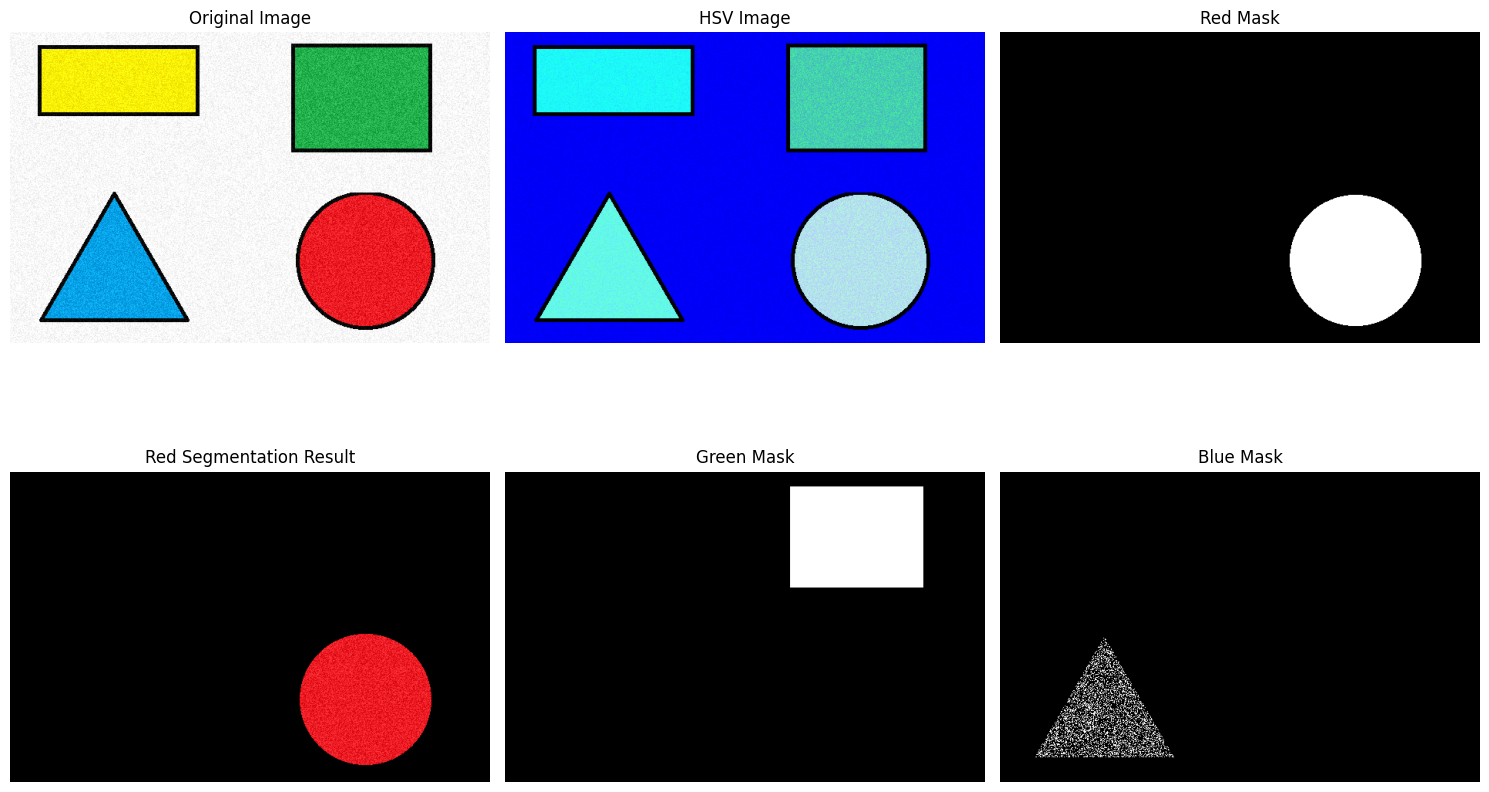

In [29]:
# BGR-ni HSV rang maydoniga aylantirish
# HSV = rang, to'yinganlik, qiymat (rangga asoslangan segmentatsiya uchun yaxshiroq)
hsv_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)

# HSV-da rang diapazonlarini aniqlang
# Misol: qizil rang segmentatsiyasi (0/180 atrofida qizil o'ramlar)
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])

# Qizil rang uchun niqoblar yarating
mask_red1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
mask_red = cv2.bitwise_or(mask_red1, mask_red2)

# Misol: yashil rang segmentatsiyasi
lower_green = np.array([35, 100, 100])
upper_green = np.array([85, 255, 255])
mask_green = cv2.inRange(hsv_image, lower_green, upper_green)

# Misol: moviy rang segmentatsiyasi
lower_blue = np.array([100, 100, 100])
upper_blue = np.array([130, 255, 255])
mask_blue = cv2.inRange(hsv_image, lower_blue, upper_blue)

# Asl rasmga niqobni qo'llang
result_red = cv2.bitwise_and(original_image, original_image, mask=mask_red)
result_green = cv2.bitwise_and(original_image, original_image, mask=mask_green)
result_blue = cv2.bitwise_and(original_image, original_image, mask=mask_blue)

# Natijalarni ko'rsatish
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(hsv_image)
axes[0, 1].set_title('HSV Image')
axes[0, 1].axis('off')

axes[0, 2].imshow(mask_red, cmap='gray')
axes[0, 2].set_title('Red Mask')
axes[0, 2].axis('off')

axes[1, 0].imshow(cv2.cvtColor(result_red, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title('Red Segmentation Result')
axes[1, 0].axis('off')

axes[1, 1].imshow(mask_green, cmap='gray')
axes[1, 1].set_title('Green Mask')
axes[1, 1].axis('off')

axes[1, 2].imshow(mask_blue, cmap='gray')
axes[1, 2].set_title('Blue Mask')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

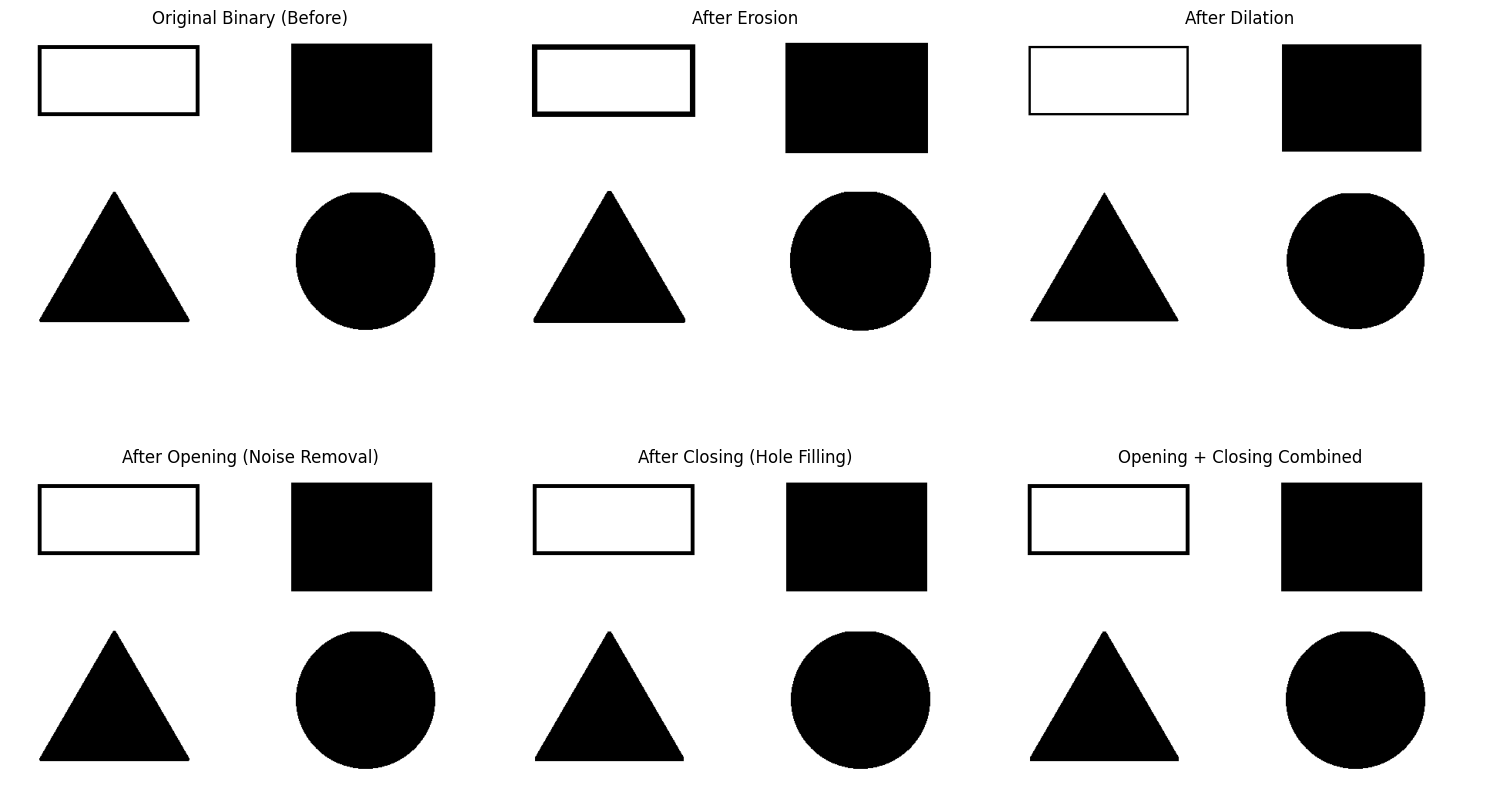

Morphological Operations Summary:
- Erosion: Removes small white noise, shrinks objects
- Dilation: Fills small holes, expands objects
- Opening: Removes noise while preserving object shape
- Closing: Fills holes while preserving object shape


In [30]:
# Tuzilish elementini yarating (yadro)
kernel_3x3 = np.ones((3, 3), np.uint8)
kernel_5x5 = np.ones((5, 5), np.uint8)

# Morfologik operatsiyalar uchun ikkilik Otsu tasviridan foydalaning
binary_image = binary_otsu.copy()

# EROZIYA: Oq joylarni qisqartiradi, kichik oq shovqinni olib tashlaydi
eroded = cv2.erode(binary_image, kernel_3x3, iterations=1)

# KENGAYTIRISH: Oq joylarni kengaytiradi, kichik teshiklarni to'ldiradi
dilated = cv2.dilate(binary_image, kernel_3x3, iterations=1)

# Ochilish: eroziya, so'ngra kengayish (shovqinni yo'q qiladi)
opened = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel_5x5)

# Yopilish: eroziyasi tomonidan ta'qib Dilation (teshik to'ldiradi)
closed = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel_5x5)

# Displeyni taqqoslash
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(binary_image, cmap='gray')
axes[0, 0].set_title('Original Binary (Before)')
axes[0, 0].axis('off')

axes[0, 1].imshow(eroded, cmap='gray')
axes[0, 1].set_title('After Erosion')
axes[0, 1].axis('off')

axes[0, 2].imshow(dilated, cmap='gray')
axes[0, 2].set_title('After Dilation')
axes[0, 2].axis('off')

axes[1, 0].imshow(opened, cmap='gray')
axes[1, 0].set_title('After Opening (Noise Removal)')
axes[1, 0].axis('off')

axes[1, 1].imshow(closed, cmap='gray')
axes[1, 1].set_title('After Closing (Hole Filling)')
axes[1, 1].axis('off')

# Birlashtirilgan: ochish, keyin yopish
combined = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel_5x5)
axes[1, 2].imshow(combined, cmap='gray')
axes[1, 2].set_title('Opening + Closing Combined')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

print("Morphological Operations Summary:")
print("- Erosion: Removes small white noise, shrinks objects")
print("- Dilation: Fills small holes, expands objects")
print("- Opening: Removes noise while preserving object shape")
print("- Closing: Fills holes while preserving object shape")

Contours found from Binary image: 1
Contours found from Canny edges: 4

Image dimensions: 623 x 403
Image area: 251069 pixels
Min contour area filter: 251 pixels
Filtered contours: 0

--- Contour Properties ---


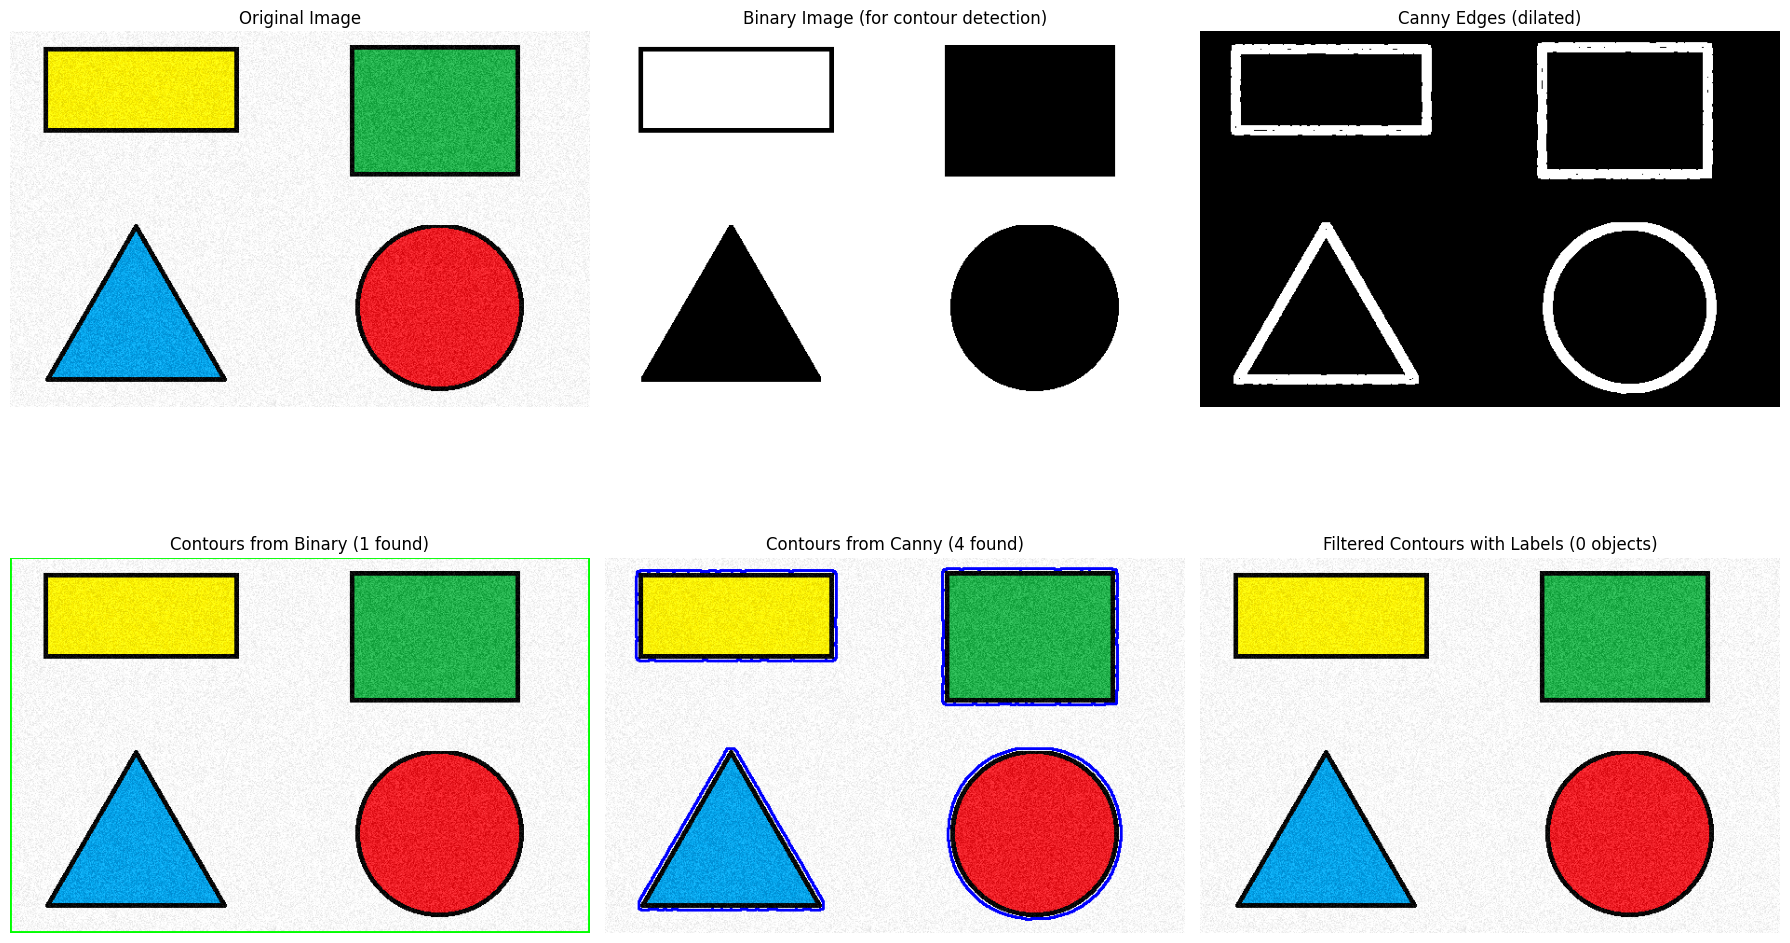


Step 8 Complete: Contours detected and drawn!


In [32]:
# First, let's ensure we have the processed binary image
# Apply morphological closing to fill gaps in contours
kernel = np.ones((5, 5), np.uint8)

# Use Otsu threshold result for contour detection
# Apply closing operation to improve contour detection
processed_for_contours = cv2.morphologyEx(binary_otsu, cv2.MORPH_CLOSE, kernel)

# Also try with Canny edges
canny_for_contours = cv2.dilate(canny_edges, kernel, iterations=1)

# ---- METHOD 1: Contours from Binary (Otsu) Image ----
contours_binary, hierarchy_binary = cv2.findContours(
    processed_for_contours,
    cv2.RETR_EXTERNAL,           # Get only external contours
    cv2.CHAIN_APPROX_SIMPLE      # Compress contour points
)

# ---- METHOD 2: Contours from Canny Edges ----
contours_canny, hierarchy_canny = cv2.findContours(
    canny_for_contours,
    cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE
)

print(f"Contours found from Binary image: {len(contours_binary)}")
print(f"Contours found from Canny edges: {len(contours_canny)}")

# ---- Draw contours on copies of original image ----

# Copy 1: All contours from binary image
image_contours_binary = original_image.copy()

# Copy 2: All contours from Canny edges
image_contours_canny = original_image.copy()

# Copy 3: Filtered contours with labels
image_contours_filtered = original_image.copy()

# Draw all contours from binary (GREEN color, thickness 2)
cv2.drawContours(image_contours_binary, contours_binary, -1, (0, 255, 0), 2)

# Draw all contours from Canny (BLUE color, thickness 2)
cv2.drawContours(image_contours_canny, contours_canny, -1, (255, 0, 0), 2)

# ---- Filter contours by area and draw with info ----
# Calculate image area for relative threshold
image_area = original_image.shape[0] * original_image.shape[1]
min_area = image_area * 0.001  # Minimum 0.1% of image area
max_area = image_area * 0.95   # Maximum 95% of image area

print(f"\nImage dimensions: {original_image.shape[1]} x {original_image.shape[0]}")
print(f"Image area: {image_area} pixels")
print(f"Min contour area filter: {min_area:.0f} pixels")

# Filter contours
filtered_contours = []
for cnt in contours_binary:
    area = cv2.contourArea(cnt)
    if min_area < area < max_area:
        filtered_contours.append(cnt)

print(f"Filtered contours: {len(filtered_contours)}")

# Define colors for different contours
colors = [
    (0, 255, 0),    # Green
    (255, 0, 0),    # Blue
    (0, 0, 255),    # Red
    (255, 255, 0),  # Cyan
    (255, 0, 255),  # Magenta
    (0, 255, 255),  # Yellow
]

# Draw each filtered contour with information
print("\n--- Contour Properties ---")
for i, contour in enumerate(filtered_contours):
    # Select color
    color = colors[i % len(colors)]

    # Draw the contour
    cv2.drawContours(image_contours_filtered, [contour], -1, color, 3)

    # Calculate contour properties
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)

    # Get bounding rectangle
    x, y, w, h = cv2.boundingRect(contour)

    # Draw bounding rectangle
    cv2.rectangle(image_contours_filtered, (x, y), (x + w, y + h), color, 2)

    # Calculate centroid using moments
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
    else:
        cx, cy = x + w // 2, y + h // 2

    # Draw centroid
    cv2.circle(image_contours_filtered, (cx, cy), 5, color, -1)

    # Add label with contour number
    label = f"#{i + 1}"
    cv2.putText(image_contours_filtered, label, (x, y - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)

    # Determine shape (approximate)
    approx = cv2.approxPolyDP(contour, 0.04 * perimeter, True)
    num_vertices = len(approx)

    if num_vertices == 3:
        shape = "Triangle"
    elif num_vertices == 4:
        # Check if square or rectangle
        aspect_ratio = float(w) / h
        if 0.9 <= aspect_ratio <= 1.1:
            shape = "Square"
        else:
            shape = "Rectangle"
    elif num_vertices == 5:
        shape = "Pentagon"
    elif num_vertices == 6:
        shape = "Hexagon"
    else:
        # Check circularity
        circularity = 4 * np.pi * area / (perimeter ** 2)
        if circularity > 0.8:
            shape = "Circle"
        else:
            shape = f"Polygon ({num_vertices} vertices)"

    print(f"Contour #{i + 1}: Shape={shape}, Area={area:.0f}, "
          f"Perimeter={perimeter:.1f}, Center=({cx}, {cy})")

# ---- Display Results ----
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Row 1
axes[0, 0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original Image', fontsize=12)
axes[0, 0].axis('off')

axes[0, 1].imshow(processed_for_contours, cmap='gray')
axes[0, 1].set_title('Binary Image (for contour detection)', fontsize=12)
axes[0, 1].axis('off')

axes[0, 2].imshow(canny_for_contours, cmap='gray')
axes[0, 2].set_title('Canny Edges (dilated)', fontsize=12)
axes[0, 2].axis('off')

# Row 2
axes[1, 0].imshow(cv2.cvtColor(image_contours_binary, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title(f'Contours from Binary ({len(contours_binary)} found)', fontsize=12)
axes[1, 0].axis('off')

axes[1, 1].imshow(cv2.cvtColor(image_contours_canny, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title(f'Contours from Canny ({len(contours_canny)} found)', fontsize=12)
axes[1, 1].axis('off')

axes[1, 2].imshow(cv2.cvtColor(image_contours_filtered, cv2.COLOR_BGR2RGB))
axes[1, 2].set_title(f'Filtered Contours with Labels ({len(filtered_contours)} objects)', fontsize=12)
axes[1, 2].axis('off')

plt.tight_layout()
plt.savefig('step8_contours_result.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n" + "=" * 50)
print("Step 8 Complete: Contours detected and drawn!")
print("=" * 50)